In [1]:
from fastai.vision.all import *

In [2]:
path=untar_data(URLs.MNIST)

In [3]:
path

Path('D:/DLLibLocation/.fastai/data/mnist_png')

In [4]:
doc(get_image_files)

In [5]:
items=get_image_files(path)

In [6]:
items

(#70000) [Path('D:/DLLibLocation/.fastai/data/mnist_png/testing/0/10.png'),Path('D:/DLLibLocation/.fastai/data/mnist_png/testing/0/1001.png'),Path('D:/DLLibLocation/.fastai/data/mnist_png/testing/0/1009.png'),Path('D:/DLLibLocation/.fastai/data/mnist_png/testing/0/101.png'),Path('D:/DLLibLocation/.fastai/data/mnist_png/testing/0/1034.png'),Path('D:/DLLibLocation/.fastai/data/mnist_png/testing/0/1047.png'),Path('D:/DLLibLocation/.fastai/data/mnist_png/testing/0/1061.png'),Path('D:/DLLibLocation/.fastai/data/mnist_png/testing/0/1084.png'),Path('D:/DLLibLocation/.fastai/data/mnist_png/testing/0/1094.png'),Path('D:/DLLibLocation/.fastai/data/mnist_png/testing/0/1121.png')...]

In [7]:
items[0]

Path('D:/DLLibLocation/.fastai/data/mnist_png/testing/0/10.png')

In [8]:
im=PILImageBW.create(items[0])

<AxesSubplot:>

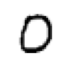

In [9]:
im.show()

GrandparentSplitter used when we have folders having train and test imgs

In [10]:
splits=GrandparentSplitter(train_name='training',valid_name='testing') # crested splits item. Didn't split actual data yet

In [11]:
#splitting items
splits=splits(items)

In [12]:
type(splits)

tuple

In [13]:
doc(Datasets)

In [14]:
dsrc=Datasets(items,tfms=[[PILImageBW.create],[parent_label,Categorize]],
             splits=splits) #how do we want our inputs to come in and how do we expect our y's to be formed

<AxesSubplot:title={'center':'0'}>

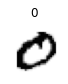

In [15]:
show_at(dsrc.train,6)

In [16]:
tfms=[ToTensor(),CropPad(size=34,pad_mode=PadMode.Zeros),RandomCrop(size=28)]
# go left to right...convert to tnsor, crop pad and then cropeed again
# this is  an instance of gpu and batch tfms
# this is item tfms used for batch tfms

In [17]:
gpu_tfms=[IntToFloatTensor(),Normalize()]

In [18]:
dbunch=dsrc.dataloaders(bs=128,after_items=tfms,after_batch=gpu_tfms)

TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'fastai.vision.core.PILImageBW'>